<a href="https://colab.research.google.com/github/gelechi/Gloze/blob/main/Copy_of_Customers_clustering_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 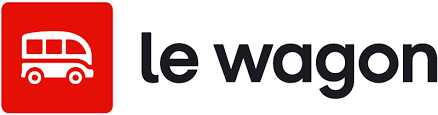

# Orders clustering

The purpose of the exercise is to extract different "typical profiles" of orders and consumers from Greenweez's turnover data. To achieve this, we will apply unsupervised learning algorithms to create order clusters.

## Orders clustering

a) Execute the cell below to load  the data into a `df` variable.

It will select 50k orders randomly (`ORDER BY rand()` in the SQL query).

In [ ]:
from google.colab import auth
import pandas as pd

# get credentials
auth.authenticate_user()

query = '''
SELECT turnover_grocery, turnover_beauty, turnover_baby, turnover_home, turnover_fresh, promo_rate
FROM `data-analytics-bootcamp-363212.course33.gwz_orders_segmentation`
ORDER BY rand()
LIMIT 50000
'''
df = pd.read_gbq(query, project_id="data-analytics-bootcamp-363212")
df.head()

b) Which features do you see?

In [ ]:
# your code here

Are there any null values?

In [ ]:
# your code here

c) Replace null values (if any exist) with 0 using `fillna()`

In [ ]:
# your code here

In [ ]:
# your code here

d) In a variable called `df_orders`, keep all the turnover columns from the original df. These features will help us cluster orders.

In [ ]:
# your code here

e) Use plotly.express and a box chart to see if the distribution of turnover is different per category (i.e. feature).

In [ ]:
# your code here

f) Most entries for the column 'turnover_fresh' do not differ from zero, it seems like people are not purchasing these products enough to conduct a meaningful analysis.

Delete the `turnover_fresh` column from `df_orders`.

In [ ]:
# your code here

g) Train a first kmeans algorithm with two a-priori clusters. Remember that distance based models, such as k-means, are greatly effected by scale. Be sure to standardize your data appropriately.


In [ ]:
# your code here

h) What is inertia for a clustering algorithm? What is inertia for this model?

In [ ]:
# your code here

i) How do we know if 2 clusters a priori was a good choice or not?
Which method could you use?

The elbow method will allow of to check inertias with differing numbers of starting clusters.

j) You will use elbow method.

You will need to loop over different values of  𝑘  (in range 1 to 10) and stores the inertia at each iteration in order to plot its evolution and select the best  𝑘.

Complete code below to do so.

In [ ]:
inertias = []
n_k = range(1, 10)

# for each number of centroids
for k in n_k:

    # your code here

k) Use plotly.express to display a line chart of all inertias.

Which number of cluster you recommend and why?

In [ ]:
# your code here

<details>
    <summary><i>Solution</i></summary>

It's hard to say for certain, but there could be some elbows between 3 and 5, so let's take 4 clusters as middle ground.
</details>

l) Train a new model with 4 clusters a priori. Use parameter n_init=100 to select best model among 100 tries.

Use `predict()` method to predict in which cluster each row of `df_orders` belong to. We will store results in a `labels` variable.

In [ ]:
# your code here

m) Use [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) function of seaborn library to count visualize number of samples per cluster. It is well distributed?

In [ ]:
# your code here

One bigger cluster and one smaller one... but overall, orders are well distributed.

n) Each KMeans cluster has a center (centroid).

You can get the values of the center for each cluster using the `.cluster_centers_` attribute on your KMeans object.

Create a DataFrame with each cluster's centroid values and the names of the features that the model has been trained on.

In [ ]:
# your code here

o) What conclusions can you draw? What are the different order profiles that emerge?

<details>
    <summary><i>Solution</i></summary>

Remember that the values in each column are the relative coordinates for each centroid across the features. The greater the magnitude of a feature for a cluster, the more important that feature is to that cluster.

In the example above, depending on the random distribution of rows we have pulled with our query, it's likely that you will see 4 types of orders : 1 with mostly groceries, 1 with beauty products, 1 with baby products and 1 with home products.
</details>

p) Add to `df` a new column label containing labels of each sample.

In [ ]:
# your code here

q) What does this instruction do? What can you say?

In [ ]:
df[df["promo_rate"] > 0].groupby("label").size() / df.groupby("label").size()

Where the promotion rate is greater than zero, we can see that the cluster we have associated with greater grocery turnover uses promotion codes more than others.